In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#reading the csv from previous directory
pd.read_csv('../data/processed/reviews.csv',index_col=[0]).head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,e4Vwtrqf-wpJfwesgvdgxQ,1,2017-01-14 20:54:15,0.0,Sx8TMOWLNuJBWer-0pcmoA,4.0,Cute interior and owner (?) gave us tour of up...,1.0,bcjbaE6dDog4jkNY91ncLQ
1,gmjsEdUsKpj9Xxu6pdjH0g,0,2015-01-03 23:21:18,2.0,6AxgBCNX_PNTOxmbRSwcKQ,5.0,Loved this tour! I grabbed a groupon and the p...,0.0,r3zeYsv1XFBRA4dJpL78cw
2,S2Ho8yLxhKAa26pBAm6rxA,0,2016-11-22 00:22:53,0.0,z0osLHDvXvzfm57D4DmD2Q,3.0,"Service was crappy, and food was mediocre. I ...",0.0,xVKE_HJ2pwUtTdLbL3pnCg
3,W4ZEKkva9HpAdZG88juwyQ,0,2013-12-29 02:37:42,0.0,jC-fGfx-YLqxVBcyTAd4Pw,3.0,"In a word... ""OVERRATED!"". The food took fore...",0.0,EBa-0-6AKoy6jziNexDJtg
4,j8JOZvfeHEfUWq3gEz6ABQ,0,2014-06-11 14:55:14,3.0,Ki90-hauSIfW_7sBuBBqfA,2.0,NEVER AGAIN. This is a so called restaurant th...,2.0,Z2cOL3n9V8NoguJ-uU_Nvw


In [7]:
# Importing the reviews dataset
reviews_dataset = pd.read_csv('../data/processed/reviews.csv',index_col=[0])

In [9]:
# Creating X and Y for the classifier. X is the review text and Y is the rating
X = reviews_dataset['text']
y = reviews_dataset['stars']

In [11]:
X.shape

(1095800,)

the text data has a lot of punctuations.. let's try and filter that out


In [13]:
X[0]

"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines."

In [14]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
chars = [x for x in X[0] if x not in string.punctuation]
without_punctuations = ''.join(chars)

now let's remove stopwords using the nltk library

In [25]:
import nltk
from nltk.corpus import stopwords

In [33]:
[word for word in without_punctuations.split() if word not in stopwords.words('english')]

['Cute',
 'interior',
 'owner',
 'gave',
 'us',
 'tour',
 'upcoming',
 'patiorooftop',
 'area',
 'great',
 'beautiful',
 'days',
 'like',
 'today',
 'Cheese',
 'curds',
 'good',
 'filling',
 'Really',
 'like',
 'sandwiches',
 'come',
 'w',
 'salad',
 'esp',
 'eating',
 'many',
 'curds',
 'Had',
 'onion',
 'gruyere',
 'tomato',
 'sandwich',
 'Wasnt',
 'much',
 'cheese',
 'I',
 'liked',
 'Needed',
 'something',
 'elsepepper',
 'jelly',
 'maybe',
 'Would',
 'like',
 'see',
 'menu',
 'options',
 'added',
 'salads',
 'w',
 'fun',
 'cheeses',
 'Lots',
 'beer',
 'wine',
 'well',
 'limited',
 'cocktails',
 'Next',
 'time',
 'I',
 'try',
 'one',
 'draft',
 'wines']

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahool/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
# there are some stopwords in capital letters..
[word for word in without_punctuations.split() if word.lower() not in stopwords.words('english')]

['Cute',
 'interior',
 'owner',
 'gave',
 'us',
 'tour',
 'upcoming',
 'patiorooftop',
 'area',
 'great',
 'beautiful',
 'days',
 'like',
 'today',
 'Cheese',
 'curds',
 'good',
 'filling',
 'Really',
 'like',
 'sandwiches',
 'come',
 'w',
 'salad',
 'esp',
 'eating',
 'many',
 'curds',
 'onion',
 'gruyere',
 'tomato',
 'sandwich',
 'Wasnt',
 'much',
 'cheese',
 'liked',
 'Needed',
 'something',
 'elsepepper',
 'jelly',
 'maybe',
 'Would',
 'like',
 'see',
 'menu',
 'options',
 'added',
 'salads',
 'w',
 'fun',
 'cheeses',
 'Lots',
 'beer',
 'wine',
 'well',
 'limited',
 'cocktails',
 'Next',
 'time',
 'try',
 'one',
 'draft',
 'wines']

we got it for a single text.. let's convert the preprocessing steps into a function to be applied on all the rows of the data

In [37]:
def text_preprocessing(text):
    chars = [x for x in text if x not in string.punctuation]
    without_punctuations = ''.join(chars)
    removed_stopwords = [word for word in without_punctuations.split() if word.lower() not in stopwords.words('english')]
    processed_text = " ".join(removed_stopwords)
    return processed_text

In [38]:
X[0]

"Cute interior and owner (?) gave us tour of upcoming patio/rooftop area which will be great on beautiful days like today. Cheese curds were very good and very filling. Really like that sandwiches come w salad, esp after eating too many curds! Had the onion, gruyere, tomato sandwich. Wasn't too much cheese which I liked. Needed something else...pepper jelly maybe. Would like to see more menu options added such as salads w fun cheeses. Lots of beer and wine as well as limited cocktails. Next time I will try one of the draft wines."

In [39]:
text_preprocessing(X[0])

'Cute interior owner gave us tour upcoming patiorooftop area great beautiful days like today Cheese curds good filling Really like sandwiches come w salad esp eating many curds onion gruyere tomato sandwich Wasnt much cheese liked Needed something elsepepper jelly maybe Would like see menu options added salads w fun cheeses Lots beer wine well limited cocktails Next time try one draft wines'

In [44]:
%%time

X_try = X[:5000].apply(text_preprocessing)

CPU times: user 24.7 s, sys: 3.95 s, total: 28.6 s
Wall time: 28.8 s


there are almost 1M data points here that's why we are applying it only on top 50,000 datapoints only and every 5000 takes around 30secs, so we will use only 50,000 so on an average it will take 300sec.

Instead of applying it on all the texts.. let's use this as an analyser in count vectorizer..
this will help in using the words as vectors and create bag of words to apply naive bayes

In [46]:
def text_preprocessing_updated(text):
    chars = [x for x in text if x not in string.punctuation]
    without_punctuations = ''.join(chars)
    removed_stopwords = [word for word in without_punctuations.split() if word.lower() not in stopwords.words('english')]
#     processed_text = " ".join(removed_stopwords)
    # Instead of joining lets return it as a list of words.
    return removed_stopwords

let's work on a sample of data only i.e. 50,000 texts

In [47]:
X_to_use = X[:50000]

In [48]:
%%time
# Expected 5min

from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(analyzer=text_preprocessing_updated).fit(X_to_use)
X_vectors = vector.transform(X_to_use)

CPU times: user 8min 19s, sys: 1min 20s, total: 9min 40s
Wall time: 9min 47s


In [54]:
X_vectors.shape

(50000, 74384)

In [56]:
y_to_use = y[:50000]

In [58]:
y_to_use.shape

(50000,)

In [59]:
# Spitting data into training, testing and validation set
from sklearn.model_selection import train_test_split
X_Train, X_test, y_Train, y_test = train_test_split(X_vectors, y_to_use, test_size=0.20, random_state=35, shuffle =False)
X_train, X_validation , y_train, y_validation = train_test_split(X_Train,y_Train, test_size = 0.1,random_state = 35, shuffle = False)

In [61]:
print("Shape of X_train :" ,X_train.shape)
print("Shape of X_test :" ,X_test.shape)
print("Shape of y_train :" ,y_train.shape)
print("Shape of y_test :" ,y_test.shape)
print("Shape of X_validation :" ,X_validation.shape)
print("Shape of y_validation :" ,y_validation.shape)

Shape of X_train : (36000, 74384)
Shape of X_test : (10000, 74384)
Shape of y_train : (36000,)
Shape of y_test : (10000,)
Shape of X_validation : (4000, 74384)
Shape of y_validation : (4000,)


In [62]:
# Multinomial Naive Bayes modle and fit it to our training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [67]:
#Let's test our model on the validation data

preds = classifier.predict(X_validation)
print("Actual Ratings(Stars):\n",y_validation[:15])
print("Predicted Ratings: ",preds[:15])

Actual Ratings(Stars):
 36000    5.0
36001    5.0
36002    5.0
36003    3.0
36004    5.0
36005    5.0
36006    2.0
36007    5.0
36008    4.0
36009    4.0
36010    4.0
36011    1.0
36012    5.0
36013    4.0
36014    5.0
Name: stars, dtype: float64
Predicted Ratings:  [5. 5. 5. 4. 4. 5. 1. 4. 4. 4. 4. 1. 5. 5. 5.]


## Evaluation Metrics

In [69]:
from sklearn.metrics import accuracy_score
accuracy_score(y_validation, preds)

0.64475

Our accuracy of the model is 64%

In [73]:
# Classification Report of the model
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_validation, preds))

[[ 303   22   34   41   22]
 [  65   14   68   91   19]
 [  34    3   67  213   70]
 [  14    2   26  441  422]
 [  18    2    7  248 1754]]


In [76]:
print(classification_report(y_validation, preds))

              precision    recall  f1-score   support

         1.0       0.70      0.72      0.71       422
         2.0       0.33      0.05      0.09       257
         3.0       0.33      0.17      0.23       387
         4.0       0.43      0.49      0.45       905
         5.0       0.77      0.86      0.81      2029

    accuracy                           0.64      4000
   macro avg       0.51      0.46      0.46      4000
weighted avg       0.61      0.64      0.62      4000



In [72]:
# Our model is very unlikely to predict the intermediate star ratings

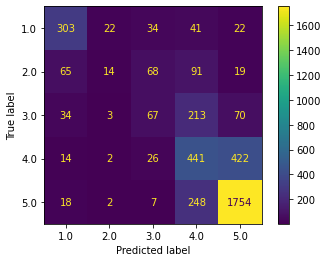

In [78]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier,X_validation,y_validation)

In [93]:
y_train.value_counts().to_frame().style.bar()

,stars
5.000000,17394
4.000000,9445
3.000000,3899
1.000000,2890
2.000000,2372


# Linear Support Vector Machine